In [1]:
from custom_classes_defs.preprocessing import *

In [5]:
path = "./data_preprocessing/data_download/full_data/ori_data"
seistest = np.load(os.path.join(path,"seistest_sort_full.npy"))
faulttest = np.load(os.path.join(path,"faulttest_full.npy"))

In [6]:
faulttest= np.moveaxis(faulttest,-2,-1)

In [7]:
print('Seismic test shape',seistest.shape)
print('Fault test shape',faulttest.shape)

Seismic test shape (703, 1537, 3174)
Fault test shape (703, 1537, 3174)


In [8]:
print(seistest.max(),seistest.min(), faulttest.max(), faulttest.min())

1.0 0.0 True False


In [9]:
directory = "./data_preprocessing/data_download/full_data/patches/seismic/test_byline"
if not os.path.exists(directory):
    os.makedirs(directory)
directory = "./data_preprocessing/data_download/full_data/patches/fault/test_byline"
if not os.path.exists(directory):
    os.makedirs(directory)

In [7]:
patches_path = './data_preprocessing/data_download/full_data/patches'

count = 0
for i in range(0,len(seistest),5):
    np.save("{}/seismic/test_byline/{}.npy".format(patches_path, count),seistest[i])
    np.save("{}/fault/test_byline/{}.npy".format(patches_path, count),faulttest[i])
    count = count + 1

### Thebe data

In [11]:
# select one of the files from test dataset
id = '20'
seis_patches_path = './data_preprocessing/data_download/full_data/patches/seismic/test_byline/'
fault_patches_path = './data_preprocessing/data_download/full_data/patches/fault/test_byline/'

seis = np.load(os.path.join(seis_patches_path,id+'.npy'))
fault = np.load(os.path.join(fault_patches_path,id+'.npy'))
print(seis.shape)
print(fault.shape)

(1537, 3174)
(1537, 3174)


In [12]:
Z, XL = seis.shape

im_height = Z
im_width = XL
splitsize = 96
stepsize = 48 #overlap half
overlapsize = splitsize-stepsize

In [13]:
horizontal_splits_number = int(np.ceil((im_width)/stepsize))
print(horizontal_splits_number)
width_after_pad = stepsize*horizontal_splits_number+2*overlapsize
print(width_after_pad)
left_pad = int((width_after_pad-im_width)/2)
right_pad = width_after_pad-im_width-left_pad
print(left_pad,right_pad)

vertical_splits_number = int(np.ceil((im_height)/stepsize))
print(vertical_splits_number)
height_after_pad = stepsize*vertical_splits_number+2*overlapsize
print(height_after_pad)
top_pad = int((height_after_pad-im_height)/2)
bottom_pad = height_after_pad-im_height-top_pad
print(top_pad,bottom_pad)

67
3312
69 69
33
1680
71 72


In [14]:
horizontal_splits_number = horizontal_splits_number+1
print(horizontal_splits_number)
vertical_splits_number = vertical_splits_number+1
print(vertical_splits_number)

68
34


In [15]:
halfoverlapsize = int(overlapsize/2)
print(halfoverlapsize)

24


In [16]:
t_start = time.time()
X_list = []

X_list.extend(split_Image(seis,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(X_list))
print(X_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
X = np.asarray(X_list)
print(X.shape)
print("read images in {} sec".format(time.time()-t_start))

X = X.astype(np.float32)
print(X.shape)

2312
(96, 96)
read images in 0.08942413330078125 sec
(2312, 96, 96)
read images in 0.13245391845703125 sec
(2312, 96, 96)


In [17]:
t_start = time.time()
Y_list = []

Y_list.extend(split_Image(fault,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(Y_list))
print(Y_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
Y = np.asarray(Y_list)
print(Y.shape)
print("read images in {} sec".format(time.time()-t_start))

Y = Y.astype(np.float32)
print(Y.shape)

2312
(96, 96)
read images in 0.014360904693603516 sec
(2312, 96, 96)
read images in 0.022362232208251953 sec
(2312, 96, 96)


In [ ]:
path = 'data_download/full_data/patches/seismic/test_output/'
if not os.path.exists(path):
    os.makedirs(path)
path = 'data_download/full_data/patches/fault/test_output/'
if not os.path.exists(path):
    os.makedirs(path)

In [25]:
seis_path = 'data_download/full_data/patches/seismic/test_output/'
seis_outpath = os.path.join(seis_path,'seis_test_'+id+'_thebe.npy')

fault_path = 'data_download/full_data/patches/fault/test_output/'
fault_outpath = os.path.join(fault_path,'fault_test_'+id+'_thebe.npy')

In [26]:
np.save(seis_outpath, X)

In [27]:
np.save(fault_outpath,Y)

### Wisting data - segy input

In [20]:
filename = './seismic_images/sgy_data/HR-IL4500.sgy'

In [21]:
data, extent = plot_segy(filename)

N Traces: 3921, N Samples: 701, Sample rate: 1.0ms, Trace length: 1200.0
2D segy shape: (3921, 701)


In [22]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 7; the max amplitude is 22'

Text(0.5, 1.0, 'HR-IL4500.SGY')

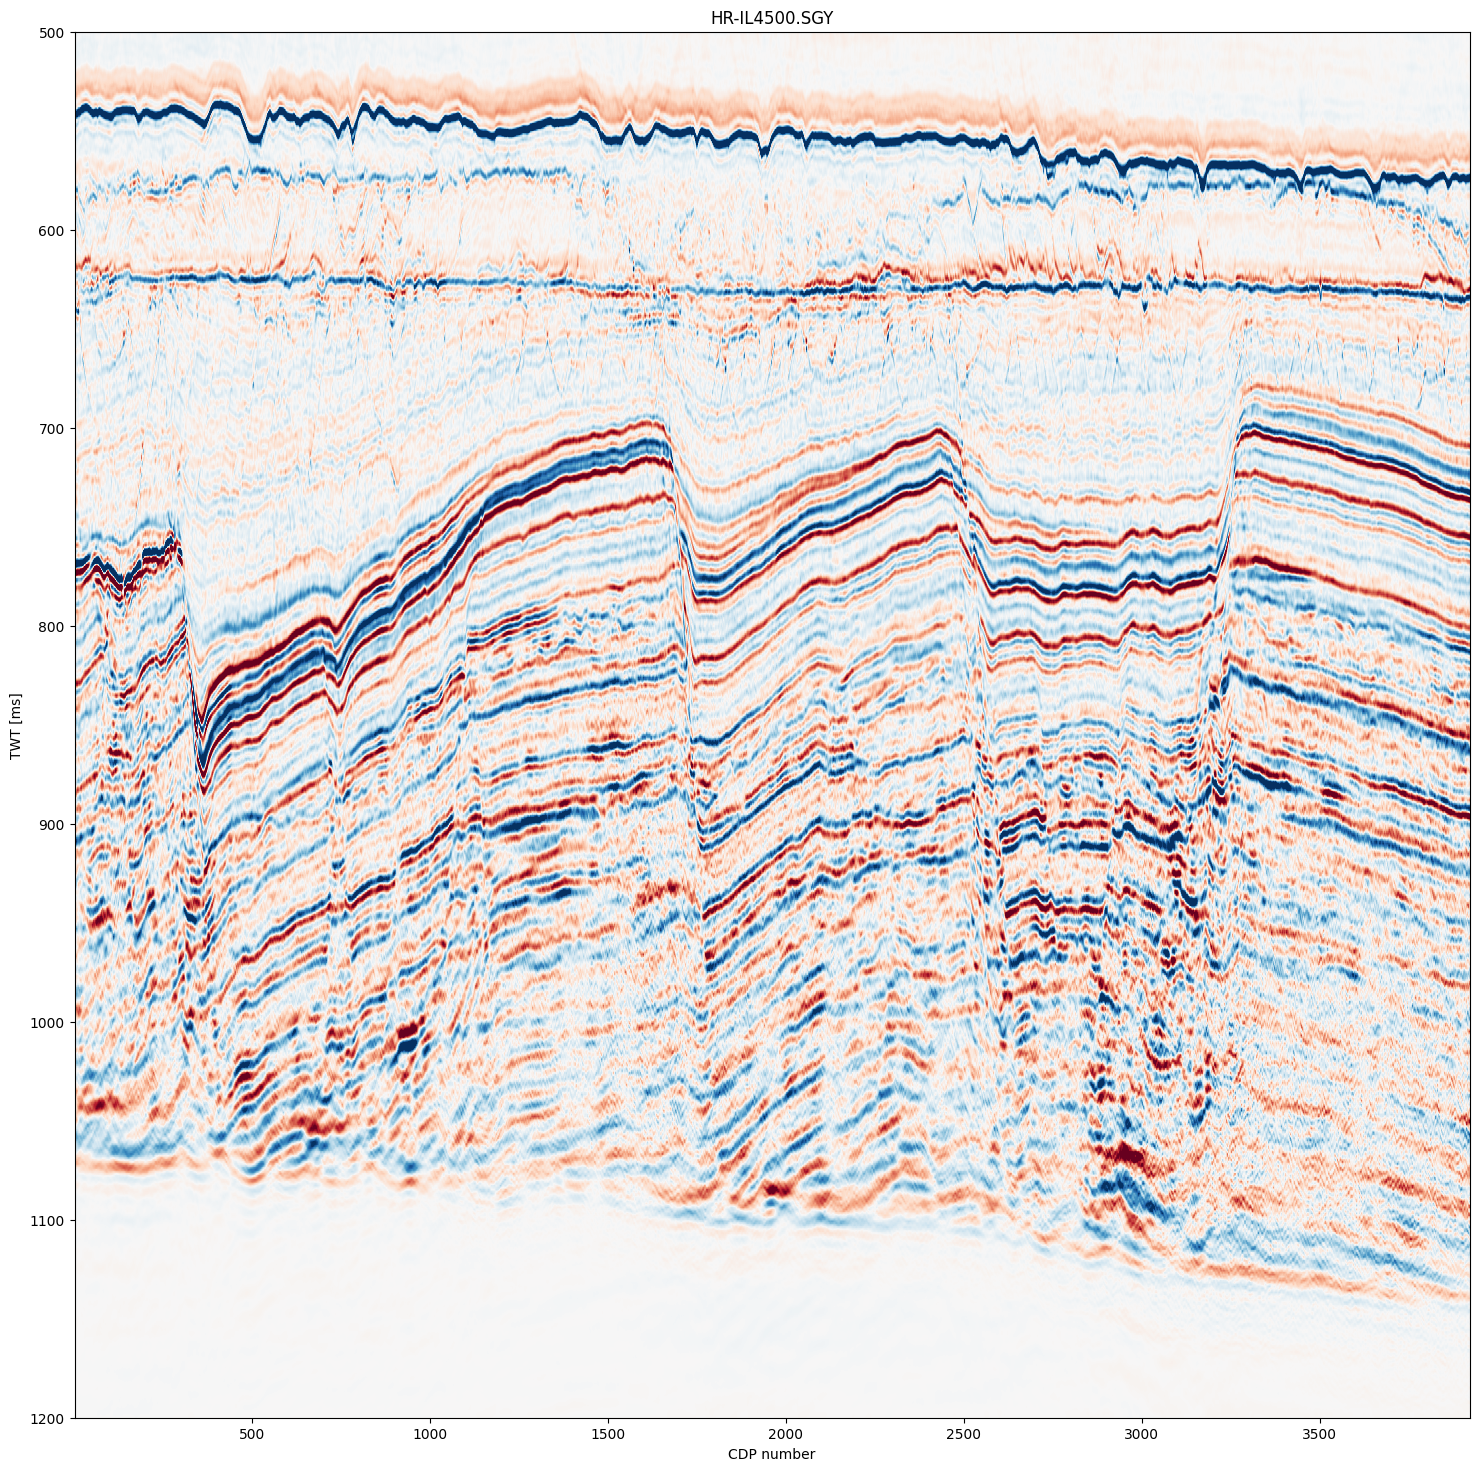

In [23]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
# optional colormap "gray_r" or "RdBu"
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT [ms]')
ax.set_title(f'HR-IL4500.SGY')

In [24]:
seismic = data.T

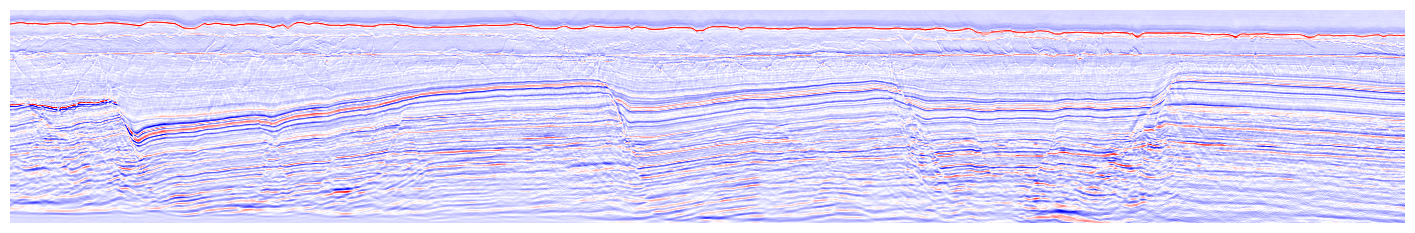

In [25]:
plt.figure(figsize=(18,18))
plt.imshow(seismic[:600,:],cmap='seismic')
plt.axis('off')
plt.show()

In [26]:
seismic.shape

(701, 3921)

In [27]:
seismic.min(),seismic.max()

(-19.192093, 22.095291)

In [28]:
seismic = (seismic - seismic.min()) / (seismic.max() - seismic.min())
seismic.min(), seismic.max()

(0.0, 1.0)

In [29]:
Z, XL = seismic.shape

im_height = Z
im_width = XL
splitsize = 96
stepsize = 48 #overlap half
overlapsize = splitsize-stepsize

In [30]:
horizontal_splits_number = int(np.ceil((im_width)/stepsize))
print(horizontal_splits_number)
width_after_pad = stepsize*horizontal_splits_number+2*overlapsize
print(width_after_pad)
left_pad = int((width_after_pad-im_width)/2)
right_pad = width_after_pad-im_width-left_pad
print(left_pad,right_pad)

vertical_splits_number = int(np.ceil((im_height)/stepsize))
print(vertical_splits_number)
height_after_pad = stepsize*vertical_splits_number+2*overlapsize
print(height_after_pad)
top_pad = int((height_after_pad-im_height)/2)
bottom_pad = height_after_pad-im_height-top_pad
print(top_pad,bottom_pad)

82
4032
55 56
15
816
57 58


In [31]:
horizontal_splits_number = horizontal_splits_number+1
print(horizontal_splits_number)
vertical_splits_number = vertical_splits_number+1
print(vertical_splits_number)

83
16


In [32]:
halfoverlapsize = int(overlapsize/2)
print(halfoverlapsize)

24


In [33]:
t_start = time.time()
X_list = []

X_list.extend(split_Image(seismic,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(X_list))
print(X_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
X = np.asarray(X_list)
print(X.shape)
print("read images in {} sec".format(time.time()-t_start))

X = X.astype(np.float32)
print(X.shape)

1328
(96, 96)
read images in 0.04250526428222656 sec
(1328, 96, 96)
read images in 0.06655240058898926 sec
(1328, 96, 96)


In [38]:
id= 'IL4500'

seis_path = 'data_download/full_data/testset/wisting_segy/'
seis_outpath = os.path.join(seis_path,'seis_test_'+id+'_wisting.npy')
np.save(seis_outpath, X)


In [40]:
wisting = np.load('data_download/full_data/testset/wisting_segy/seis_test_IL4500_wisting.npy')

In [42]:
wisting.shape

(1328, 96, 96)

In [49]:
fault = np.zeros_like(wisting)
fault.shape
np.save('data_download/full_data/testset/wisting_segy/fault_test_IL4500_dummy.npy',fault)

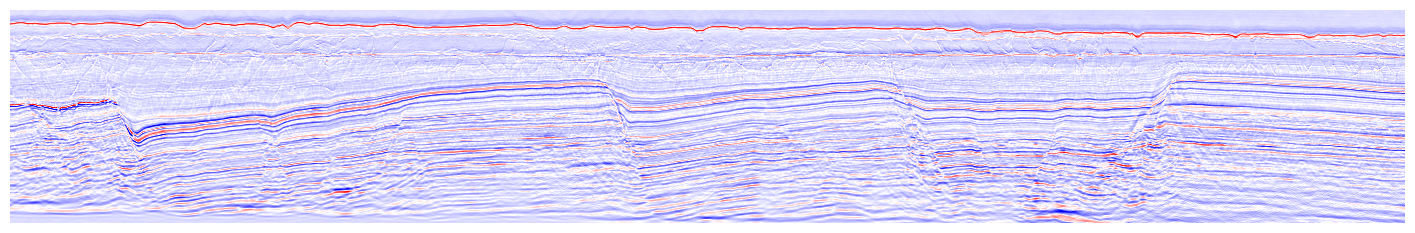

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(seismic[:600,:],cmap='seismic')
plt.axis('off')
plt.show()

In [51]:
wisting_pred_unet1 = np.load('../unet1_pred.npy')

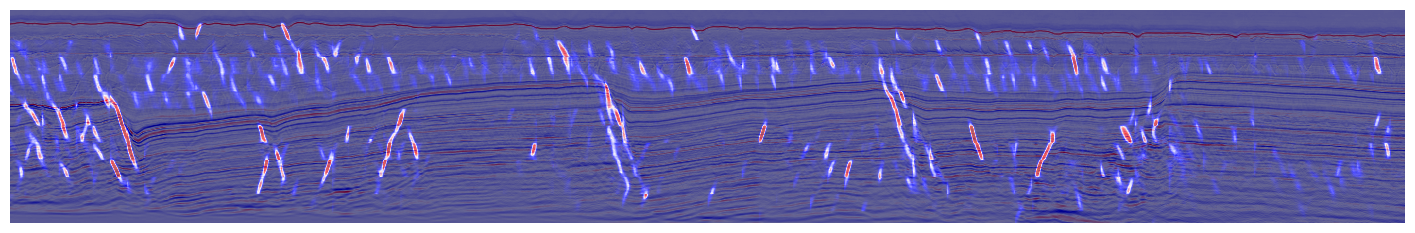

In [59]:
plt.figure(figsize=(18,18))
plt.imshow(seismic[:600,:],cmap='seismic')
plt.imshow(wisting_pred_unet1[:600,:],cmap='seismic',alpha=0.6)
plt.axis('off')
plt.show()